In [1]:
cd ..

/Users/ibampc/Documents/metrics-material/weekly/week2


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
from lib.helper import housing_preprocessing_pipeline

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Metrics Week #4 - Machine Learning 01

![](https://pics.me.me/me-wondering-why-my-ai-is-classifying-my-cat-as-72552652.png)


#### [Presentations links (Google Slides)](https://docs.google.com/presentation/d/1itguEJj4dQ3BfXlSTw0oWic51X2-91oSC6cStILKKzA/edit#slide=id.p)

## Machine Learning Models (Example)

### Linear Regression

Predicting house value in particular area

#### Load and split the Dataset

In [3]:
housing_train = pd.read_csv('dataset/housing_train.csv')
housing_test = pd.read_csv('dataset/housing_test.csv')
housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


#### Gaining Insight from Dataset

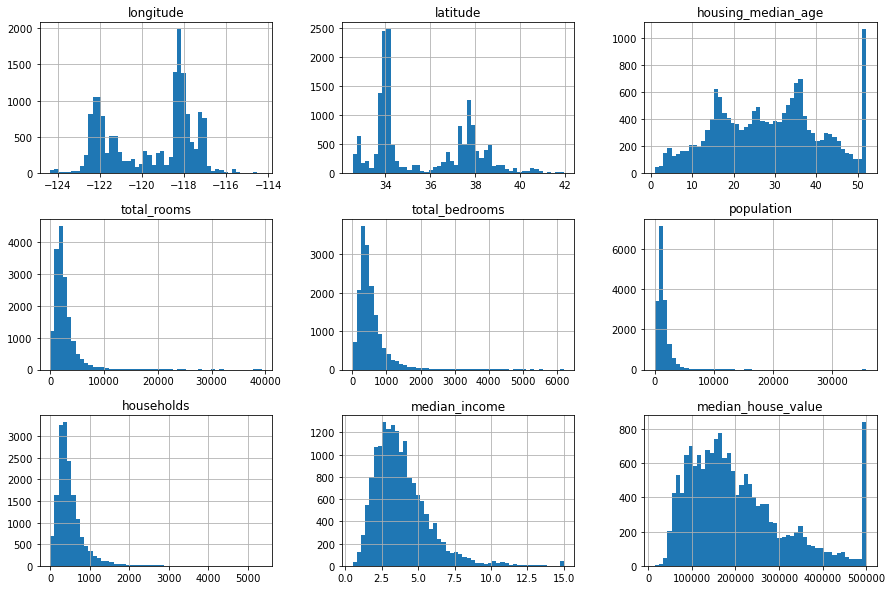

In [4]:
housing_train.hist(bins=50, figsize=(15,10))
plt.show()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

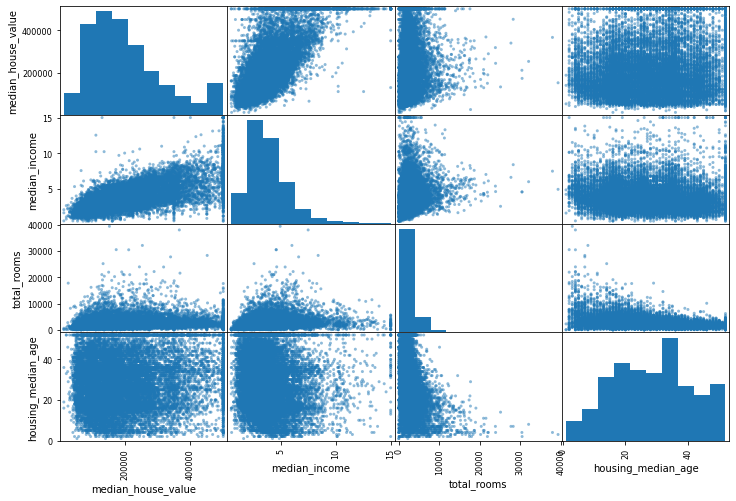

In [5]:
corr_matrix = housing_train.corr()
display(corr_matrix)
display(corr_matrix['median_house_value'].sort_values(ascending=False))
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing_train[attributes], figsize=(12,8))
plt.show()

#### Get the independent and dependent variable

In [6]:
housing_train_X = housing_train.drop(columns='median_house_value')
housing_train_y = housing_train['median_house_value'].copy()
housing_test_X = housing_test.drop(columns='median_house_value')
housing_test_y = housing_test['median_house_value'].copy()

#### Simple feature engineering

In [7]:
preprocessor = housing_preprocessing_pipeline()
housing_train_X_prepared = preprocessor.fit_transform(housing_train_X)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
lin_model = regressor.fit(housing_train_X_prepared, housing_train_y)

#### Train the dataset

In [8]:
some_data = housing_train_X.iloc[:5]
some_labels = housing_train_y.iloc[:5]
some_data_prepared = preprocessor.transform(some_data)
print(f'Predictions: {[round(x, 2) for x in lin_model.predict(some_data_prepared)]}')
print(f'Real values: {list(some_labels)}')

Predictions: [210644.6, 317768.81, 210956.43, 59218.99, 189747.56]
Real values: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


#### Evaluate on the test set

In [9]:
# Evaluation Metrics

from sklearn.metrics import mean_squared_error
housing_test_X_prepared = preprocessor.transform(housing_test_X)
housing_predictions = regressor.predict(housing_test_X_prepared)
lin_mse = mean_squared_error(housing_test_y, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f'RMSE: {round(lin_rmse, 2)}')

RMSE: 66911.98


#### How it works?

[Descending into ML: Linear Regression](https://developers.google.com/machine-learning/crash-course/descending-into-ml/linear-regression)

### Logistic Regression

Not 5 Classifier

#### Load Dataset

In [10]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
display(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [11]:
X, y = mnist['data'], mnist['target']
y = y.astype('int64')
display(X.shape)
display(y.shape)
display(X.head())
display(y.head())

(70000, 784)

(70000,)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int64

#### Example Data

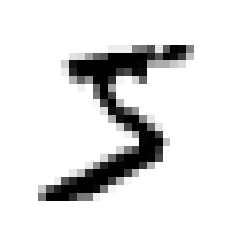

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# pick a digit
some_digit = X.iloc[0].values
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis('off')
plt.show()

#### Splitting dataset

In [13]:
splitting_index = 60000
X_train, X_test = X[:splitting_index], X[splitting_index:]
y_train, y_test = y[:splitting_index], y[splitting_index:]
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

#### Build classifier

In [14]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42, loss='log')
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(loss='log', random_state=42)

In [15]:
sgd_clf.predict([some_digit]) # predicting only '5' number

array([ True])

#### Evaluation metrics

In [16]:
from sklearn.model_selection import cross_val_score
f1_score = cross_val_score(sgd_clf, X_train
                           , y_train_5, cv=3, scoring='f1')
accuracy_score = cross_val_score(sgd_clf, X_train
                                 , y_train_5, cv=3, scoring='accuracy')

print(f'F1 Score: {f1_score}')
print(f'Accuracy Score: {accuracy_score}')

F1 Score: [0.75537506 0.82501434 0.79863903]
Accuracy Score: [0.9488  0.9695  0.96745]


#### Why accuracy could be a misleading metrics in classification?

In [17]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
## Try using very dumb model

never_5_clf = Never5Classifier()
accuracy_dummy = cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')
f1_dummy = cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='f1')

print(f'Accuracy Score: {accuracy_dummy}')
print(f'F1 Score: {f1_dummy}')

Accuracy Score: [0.91125 0.90855 0.90915]
F1 Score: [0. 0. 0.]


In [18]:
y_train_5.value_counts()

False    54579
True      5421
Name: class, dtype: int64

#### Using Confusion Matrix

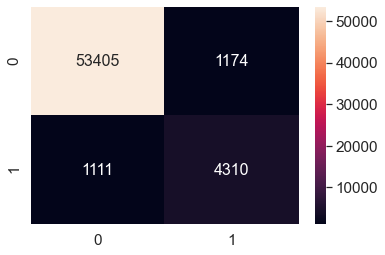

Precision: 0.786
Recall: 0.795
F1 score: 0.790


In [19]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

array = confusion_matrix(y_train_5, y_train_pred)

df_cm = pd.DataFrame(array)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d') # font size

plt.show()

print(f'Precision: {precision_score(y_train_5, y_train_pred):.3f}')
print(f'Recall: {recall_score(y_train_5, y_train_pred):.3f}')
print(f'F1 score: {f1_score(y_train_5, y_train_pred):.3f}')

#### Precision & Recall Trade Off

In [21]:
y_scores = sgd_clf.decision_function([some_digit])
print(f'Decision score: {y_scores}')
threshold = 0
display((y_scores > threshold))
threshold = 8000
display((y_scores > threshold)) # Increasing threshold will reducing recall

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3
                            , method='decision_function')
y_scores

Decision score: [1780.22115429]


array([ True])

array([False])

array([  7315.51893069, -13224.65370633, -24058.215006  , ...,
         6776.27539519,  -8670.04443642, -17759.36296428])

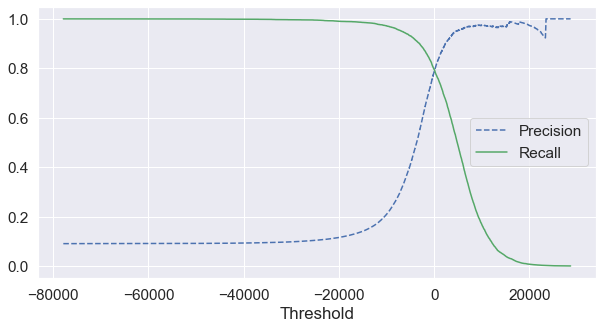

In [22]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5
                                                         , y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(10,5))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel('Threshold')
    plt.legend()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

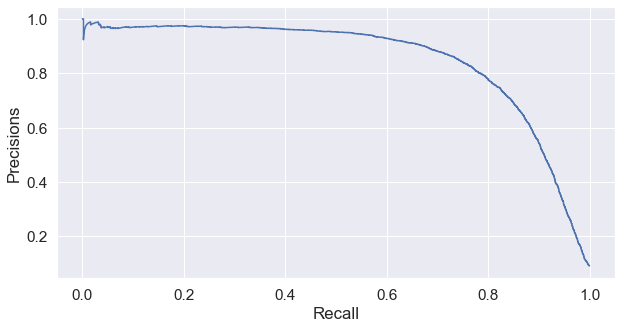

In [23]:
plt.figure(figsize=(10,5))
plt.plot(recalls, precisions)
plt.ylabel('Precisions')
plt.xlabel('Recall')
plt.show()

#### Customizing Precision and Recall

In [28]:
threshold_95_precision = thresholds[np.argmax(precisions >= 0.95)]
print(f'Decision score for 95% precision: {threshold_95_precision:.3f}')
y_train_pred_95 = (y_scores >= threshold_95_precision)
print(f'Precision: {precision_score(y_train_5, y_train_pred_95):.3f}')
print(f'Recall: {recall_score(y_train_5, y_train_pred_95):.3f}')
print(f'Precision: {f1_score(y_train_5, y_train_pred_95):.3f}')

Decision score for 95% precision: 4549.379
Precision: 0.950
Recall: 0.523
Precision: 0.675


Virtually, we can decide any precision we wants. But remember that as the precision score is going up, the recall is always falling.

So, when someone says "let's get a high precision score" you should alyways said "at what recall"?

![](https://i.kym-cdn.com/photos/images/newsfeed/001/718/138/147.jpg)

#### How it works?

[Logistic Regression: Calculating a Probability](https://developers.google.com/machine-learning/crash-course/logistic-regression/calculating-a-probability)